## Final Project using NB, FFNN, and LSTM
#### Complexity isn't Always Better

Accuracy for the NB model: 73.68%
F1 Score for the NB model: 75.00%
Precision for the NB model: 73.17%
Recall for the NB model: 76.92%


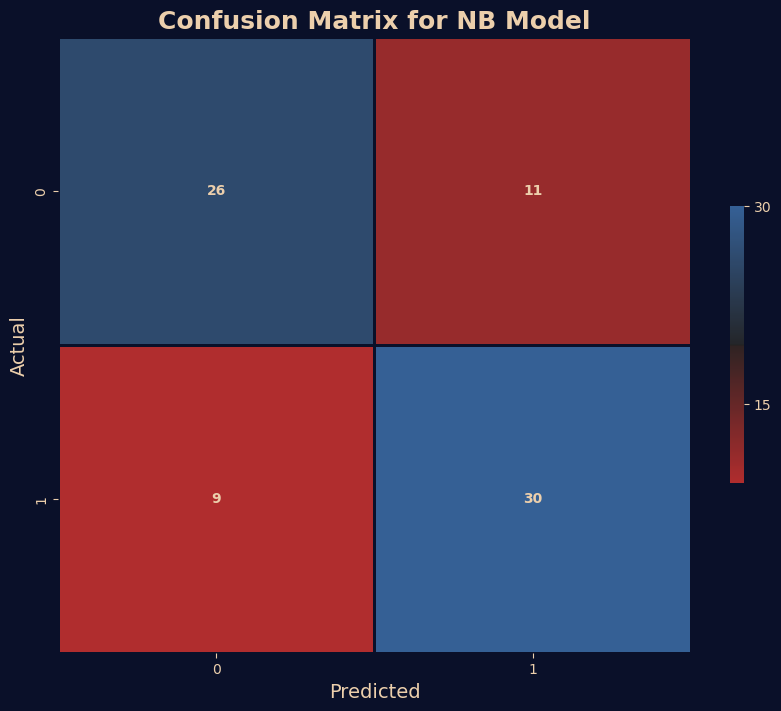

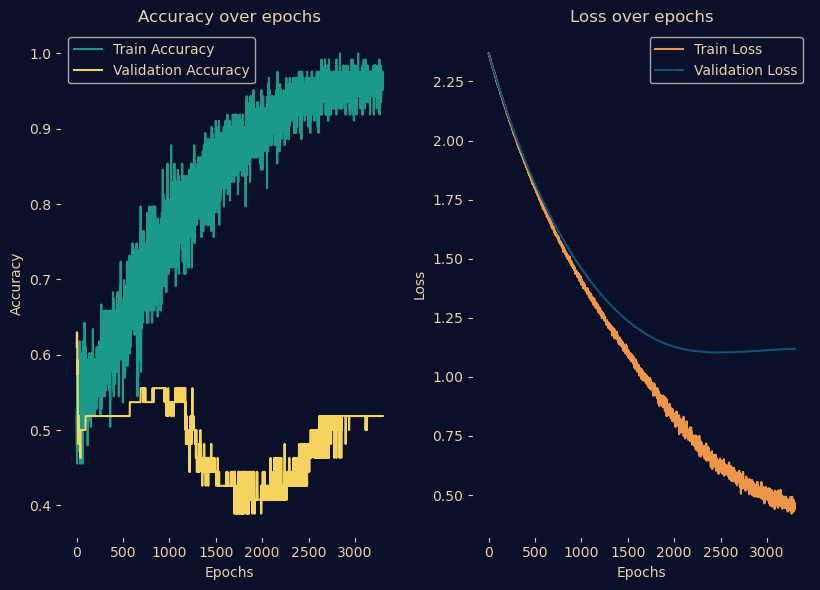

3/3 [==============================] - 0s 1ms/step
Accuracy for the FFNN model: 56.58%
F1 Score for the FFNN model: 57.14%
Precision for the FFNN model: 57.89%
Recall for the FFNN model: 56.41%


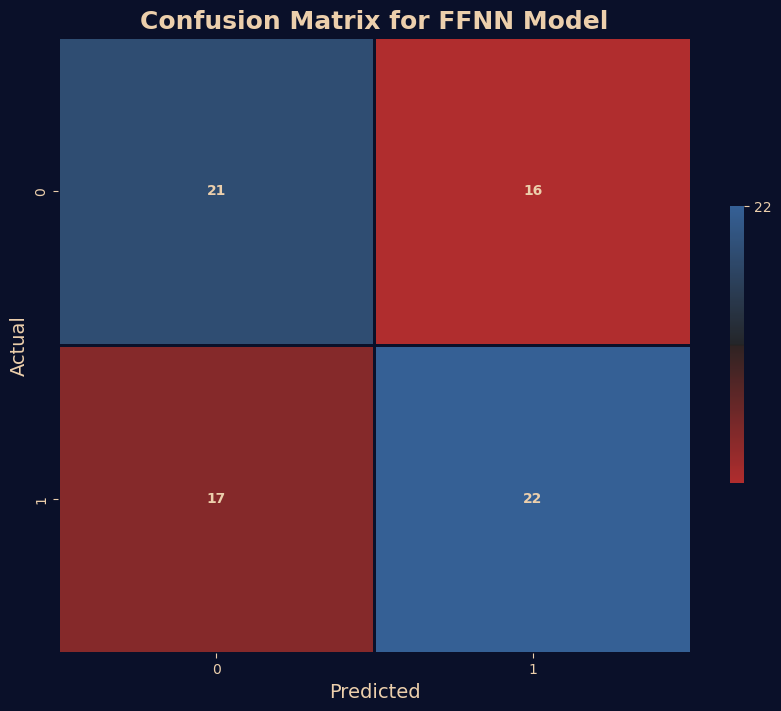

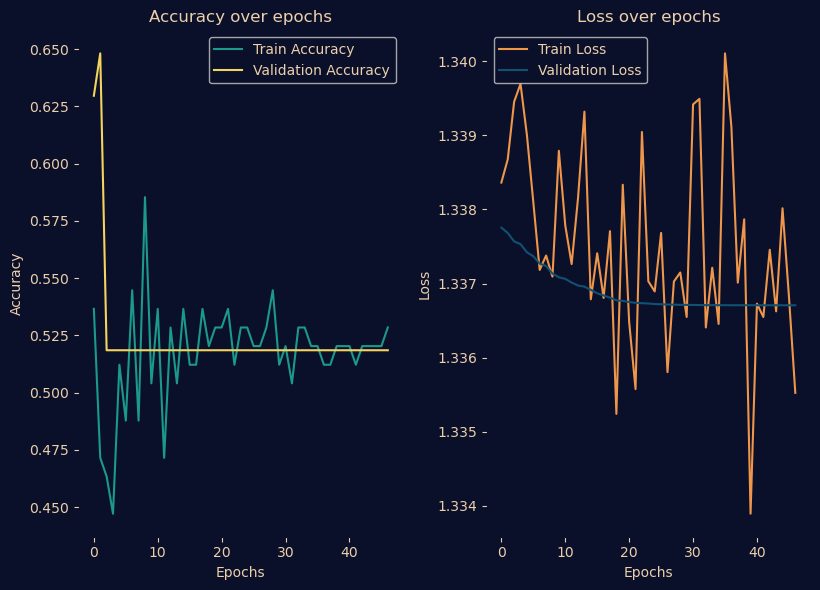

3/3 [==============================] - 9s 359ms/step
Accuracy for the LSTM model: 48.68%
F1 Score for the LSTM model: 0.00%
Precision for the LSTM model: 0.00%
Recall for the LSTM model: 0.00%


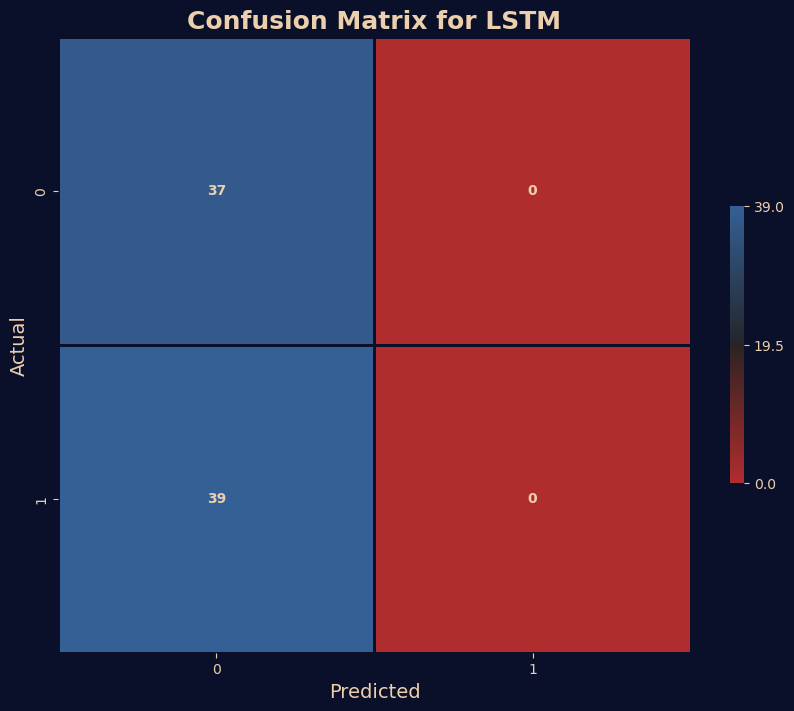

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import re
import matplotlib.pyplot as plt
import seaborn as sns
from Sentiment import SentimentAnalysisModel

file_path = 'michael_project_item7.parquet'
dataframe = pd.read_parquet(file_path)
text_column_name = 'Item_7'
model = SentimentAnalysisModel(dataframe, text_column_name)

# Preprocess the text data
model.preprocess()

# Create the target variable
model.dataframe['target'] = (model.dataframe['cumRet'] > 0).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(model.dataframe['cleaned_text'], model.dataframe['target'], test_size=0.3, random_state=42)

# Vectorize text
X_train_vec, X_test_vec = model.vectorize_text(X_train, X_test)

# Train and evaluate Naive Bayes model
accuracy_nb, cm_nb = model.train_model(X_train_vec, y_train, X_test_vec, y_test, model_type='nb')

# Train and evaluate Feed-forward Neural Network
accuracy_ffnn, cm_ffnn = model.train_model(X_train_vec, y_train, X_test_vec, y_test, model_type='ffnn')

# Train and evaluate LSTM Model
accuracy_lstm, f1_lstm, precision_lstm, recall_lstm, cm_lstm = model.train_lstm(X_train, y_train, X_test, y_test)


## **Model Performance Analysis**

**The key Concern for investments** in this scenario would be for a predictive model to **falsely anticipate positive returns.** When the actual outcome is negative. Such errors are particularly detrimental as they may lead to financial losses based on incorrect predictions, whereas the opposite error (predicting negative returns when the actual outcome is positive) would only result in missed opportunities.

### **Naive Bayes Model**

- **Accuracy**: The Naive Bayes model exhibits commendable comparative accuracy.
- **Error Minimization**: It maintains a relatively balanced confusion matrix, effectively minimizing the critical type of error.
- **Practicality**: Its simpler approach results in a practical trade-off, predicting gains while avoiding unexpected losses, thus making it a **reliable choice** for investors focused on avoiding false positives.

### **Feed-Forward Neural Network & Long Short-Term Memory Models**

- **Complexity vs. Performance**: Despite their computational complexity, both models do not perform as well, tending to misclassify negative returns as positive (and vice versa).
- **Over-Cautious Strategy**: The LSTM model, in particular, adopts an overly cautious strategy, leading to a complete absence of positive return predictions (or, sometimes after recalculation the inverse), which is impractical for investment purposes.

### **Conclusion**

- **Simplicity as an Asset**: The simplest model, Naive Bayes, excels in minimizing the most costly errors for investors.
- **Model Selection Principle**: This underscores the principle that in predictive analytics, especially in finance, **a model's complexity does not inherently ensure better real-world performance**. It is crucial to select a model based on its **practical effectiveness** in reducing costly mispredictions, rather than its theoretical sophistication.
